# Is there a salary difference between seasons? 

## Import the required packages, data, and clean the data

In [31]:
exec(open("../Scripts/Packages.py").read())
exec(open("../Scripts/Data_Import.py").read())
exec(open("../Scripts/Data_Cleaning.py").read())
list(Salary_Analysis)

['yearID',
 'teamID',
 'lgID',
 'playerID',
 'salary',
 'birthCountry',
 'nameFirst',
 'nameLast',
 'weight',
 'height',
 'bats',
 'throws',
 'age',
 'yearsPlayed']

Keep only applicable columns for this analysis

In [38]:
Year_Analysis = Salary_Analysis.loc[:, ['yearID', 'salary']]

SyntaxError: invalid syntax (<ipython-input-38-616ca82ae7e6>, line 1)

## Graph the data to manually examine the differences in the group

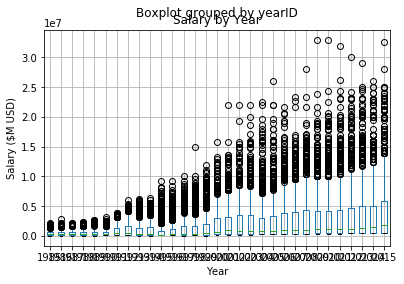

In [33]:
Year_Analysis.boxplot(by = 'yearID')
plt.title('Salary by Year')
plt.xlabel('Year')
plt.ylabel('Salary ($M USD)')
plt.show()

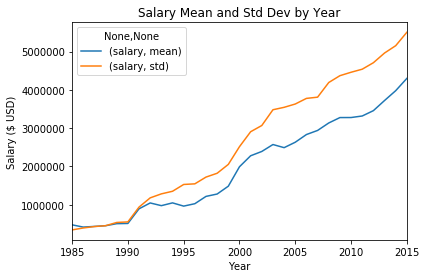

In [34]:
Salaries_YearID = Year_Analysis.groupby('yearID')
Salaries_Stats = Salaries_YearID.agg([np.mean, np.std])
Salaries_Stats.plot()
plt.title('Salary Mean and Std Dev by Year')
plt.xlabel('Year')
plt.ylabel('Salary ($ USD)')
plt.show()

## Use statistical testing to confirm the variance

NB: This probably should be using a friedman test as the variables are not really independent

Note: Unable to use ANOVA test due to the significant variations in standard deviations between the years. 

In [35]:
Pivot = Year_Analysis.pivot(columns='yearID', values='salary')

In [36]:
H, pval = mstats.kruskalwallis([Pivot[col] for col in Pivot.columns])


print("H-statistic:", H)
print("P-Value:", pval)

if pval < 0.001:
    print("Reject NULL hypothesis - Significant differences exist between groups.")
if pval > 0.001:
    print("Accept NULL hypothesis - No significant difference between groups.")

H-statistic: 5612.07238673
P-Value: 0.0
Reject NULL hypothesis - Significant differences exist between groups.
